In [1]:
import os
import pandas as pd
import seaborn as sb
import sklearn as sk
import numpy as np

In [2]:
data=pd.read_csv("C:/MLDATASETS/50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
103,False,False,False,False,False
104,False,False,False,False,False
105,False,False,False,False,False
106,False,False,False,False,False


In [6]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
#feature enconding-transformaion of cateogorical column into numeric
#female -0 male-1

In [9]:
#to identify the number of cateogeries in the dataset we have a function called value_counts()
data['State'].value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

In [10]:
#encoding using dictionary - shown when doing preprocess
#encoding using dummies under pandas
#Label encoder
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()       #initializing

In [12]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
data["State"]=le.fit_transform(data["State"])

In [14]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [15]:
#encoding useing get_dummies
#st=pd.get_dummies(data,columns=["State"])
#st

In [16]:
x=data.drop(columns=["Profit"])

In [17]:
y=data["Profit"]

In [18]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


# scaling

In [19]:
#scaling using scale function 
#minmax scale 
from sklearn.preprocessing import MinMaxScaler

In [20]:
scale= MinMaxScaler(feature_range=(0,1))

In [21]:
names = x.columns
names

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')

In [22]:
x=scale.fit_transform(x)

In [23]:
x

array([[1.        , 0.65174393, 1.        , 1.        ],
       [0.98335946, 0.76197173, 0.94089337, 0.        ],
       [0.92798459, 0.37957895, 0.8646636 , 0.5       ],
       [0.87313643, 0.51299839, 0.81223513, 1.        ],
       [0.85943772, 0.30532804, 0.77613557, 0.5       ],
       [0.797566  , 0.3694479 , 0.76912588, 1.        ],
       [0.81412828, 0.73016111, 0.27071031, 0.        ],
       [0.7880179 , 0.71745725, 0.68649342, 0.5       ],
       [0.72901786, 0.74173276, 0.66049977, 1.        ],
       [0.74590551, 0.43692884, 0.64644319, 0.        ],
       [0.61635061, 0.45150637, 0.48573267, 0.5       ],
       [0.60884455, 0.30836422, 0.52936195, 0.        ],
       [0.56766982, 0.57883556, 0.52956308, 0.5       ],
       [0.55635219, 0.64106561, 0.53555202, 0.        ],
       [0.72539353, 0.8013272 , 0.54370828, 0.5       ],
       [0.69261666, 0.54302973, 0.55486446, 1.        ],
       [0.47180821, 0.53527036, 0.56031151, 0.        ],
       [0.57246821, 0.71401273,

In [24]:
data=pd.DataFrame(x,columns=names)
data

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5
...,...,...,...,...
103,0.725394,0.801327,0.543708,0.5
104,0.692617,0.543030,0.554864,1.0
105,0.471808,0.535270,0.560312,0.0
106,0.572468,0.714013,0.598948,1.0


In [25]:
x=pd.DataFrame(x,columns=names)
#changing the array data into dataFrame

In [26]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5


# Splitting the data into train test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=111)

# Model Building

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(x_train,y_train)

LinearRegression()

# Evaluate the performance

#here the model(linear regression) got fitted with train data (x_train and y_train)

#now we need to check for performance

#for that we have a function called ROOT MEAN SQUARE ERROR

RMSE

E = error = yact - ypred

SE = squared error = E*E

MSE = mean squared error = SE.mean()

RMSE = root mean square error=sqrt(MSE)

In [32]:
#check for train data
pred = model.predict(x_train)

In [33]:
pred

array([102196.71861265, 128546.28500864, 148153.01127419,  75547.01552928,
       130604.52868842, 126086.6048649 , 101728.90519854, 128484.35489416,
       162517.6959426 ,  77006.16686902, 169752.56699857,  63115.3370295 ,
       151262.05390202, 190526.14043549, 158268.18175104, 118378.28892283,
        98566.30836192,  98397.44197585,  65600.93203752, 162517.6959426 ,
        58922.6967375 ,  77006.16686902, 172288.12499542, 133654.08376553,
       145803.16781827, 185463.93713345, 190526.14043549, 115629.62525393,
       151262.05390202,  91184.11040238,  52278.31523938,  71408.90163111,
        99800.82880537, 155095.56368724, 179436.80377919, 185463.93713345,
       126086.6048649 , 114058.91845612, 114868.45201873,  72491.55440825,
       114058.91845612,  83943.6781929 ,  49851.53893161, 133654.08376553,
       130604.52868842, 169752.56699857, 115755.75806346,  72344.01416382,
       148153.01127419,  71408.90163111, 152277.4929459 , 103118.4626943 ,
       103118.4626943 , 1

In [34]:
y_train

67     103282.38
101    141585.52
53     132602.65
79      78239.91
56     125370.37
         ...    
19     122776.86
86      42559.73
106    125370.37
107    124266.90
84      64926.08
Name: Profit, Length: 86, dtype: float64

In [35]:
#converting the y_train values into array
yact = np.array(y_train)

In [36]:
yact

array([103282.38, 141585.52, 132602.65,  78239.91, 125370.37, 134307.35,
       107404.34, 124266.9 , 156991.12,  90708.19, 166187.94,  69758.98,
       152211.77, 192261.83, 155752.6 , 111313.02,  96778.92,  97427.84,
        65200.33, 156991.12,  49490.75,  90708.19, 182901.99, 144259.4 ,
       129917.04, 191792.06, 192261.83, 105008.31, 152211.77,  96712.8 ,
        35673.41,  71498.49,  99937.59, 156122.51, 191050.39, 191792.06,
       134307.35, 108552.04, 110352.25,  96479.51, 108552.04,  81005.76,
        14681.4 , 144259.4 , 125370.37, 166187.94, 118474.03,  81229.06,
       132602.65,  71498.49, 149759.96, 101004.64, 101004.64, 144259.4 ,
       134307.35,  97483.56,  97483.56,  81005.76,  99937.59,  64926.08,
       156122.51, 122776.86,  89949.14,  89949.14,  96778.92, 129917.04,
       111313.02,  96712.8 , 132602.65, 103282.38,  14681.4 , 105733.54,
       146121.95, 141585.52, 155752.6 , 124266.9 ,  97427.84,  78239.91,
        69758.98, 105008.31,  77798.83, 122776.86, 

In [37]:
error= yact-pred

In [38]:
error

array([  1085.66138735,  13039.23499136, -15550.36127419,   2692.89447072,
        -5234.15868842,   8220.7451351 ,   5675.43480146,  -4217.45489416,
        -5526.5759426 ,  13702.02313098,  -3564.62699857,   6643.6429705 ,
          949.71609798,   1735.68956451,  -2515.58175104,  -7065.26892283,
        -1787.38836192,   -969.60197585,   -400.60203752,  -5526.5759426 ,
        -9431.9467375 ,  13702.02313098,  10613.86500458,  10605.31623447,
       -15886.12781827,   6328.12286655,   1735.68956451, -10621.31525393,
          949.71609798,   5528.68959762, -16604.90523938,     89.58836889,
          136.76119463,   1026.94631276,  11613.58622081,   6328.12286655,
         8220.7451351 ,  -5506.87845612,  -4516.20201873,  23987.95559175,
        -5506.87845612,  -2937.9181929 , -35170.13893161,  10605.31623447,
        -5234.15868842,  -3564.62699857,   2718.27193654,   8885.04583618,
       -15550.36127419,     89.58836889,  -2517.5329459 ,  -2113.8226943 ,
        -2113.8226943 ,  

<AxesSubplot:ylabel='Count'>

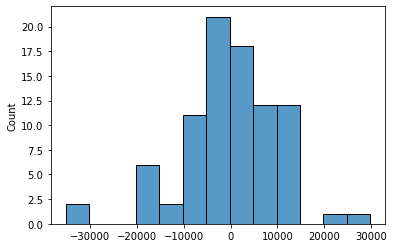

In [39]:
sb.histplot(error)

In [40]:
SE = error*error

In [41]:
SE

array([1.17866065e+06, 1.70021649e+08, 2.41813736e+08, 7.25168063e+06,
       2.73964172e+07, 6.75806506e+07, 3.22105602e+07, 1.77869258e+07,
       3.05430416e+07, 1.87745438e+08, 1.27065656e+07, 4.41379919e+07,
       9.01960667e+05, 3.01261826e+06, 6.32815155e+06, 4.99180250e+07,
       3.19475716e+06, 9.40127992e+05, 1.60481992e+05, 3.05430416e+07,
       8.89616193e+07, 1.87745438e+08, 1.12654130e+08, 1.12472732e+08,
       2.52369057e+08, 4.00451390e+07, 3.01261826e+06, 1.12812338e+08,
       9.01960667e+05, 3.05664087e+07, 2.75722878e+08, 8.02607584e+03,
       1.87036244e+04, 1.05461873e+06, 1.34875385e+08, 4.00451390e+07,
       6.75806506e+07, 3.03257103e+07, 2.03960807e+07, 5.75422013e+08,
       3.03257103e+07, 8.63136331e+06, 1.23693867e+09, 1.12472732e+08,
       2.73964172e+07, 1.27065656e+07, 7.38900232e+06, 7.89440395e+07,
       2.41813736e+08, 8.02607584e+03, 6.33797213e+06, 4.46824638e+06,
       4.46824638e+06, 1.12472732e+08, 6.75806506e+07, 8.88520734e+08,
      

In [42]:
MSE = SE.mean()

In [43]:
MSE

101748000.26805343

In [44]:
np.sqrt(MSE)    #RMSE

10087.021377396472

In [45]:
from sklearn import metrics

In [46]:
np.sqrt(metrics.mean_squared_error(y_train,pred))

10087.021377396472

In [47]:
metrics.r2_score(y_train,pred)  #model is able to explain 93% of the data

0.9313695122071292

# test

In [48]:
predt=model.predict(x_test)

In [49]:
predt

array([115755.75806346,  48165.96300997, 101728.90519854, 114868.45201873,
        77236.6201794 , 110640.30596074,  65600.93203752, 152277.4929459 ,
        92332.2342415 , 128546.28500864, 110315.43293276, 179436.80377919,
       115968.49877423, 110315.43293276, 145803.16781827, 172288.12499542,
        52278.31523938, 134527.80113223,  58922.6967375 ,  72344.01416382,
       115968.49877423, 115968.49877423])

In [50]:
np.sqrt(metrics.mean_squared_error(y_test,predt))

8936.913986954203

In [51]:
metrics.r2_score(y_test,predt)

0.9496733185604666

# POLYNOMIAL REGRESSION

In [52]:
datav= pd.read_csv("C:/MLDATASETS/Position_Salaries.csv")

In [53]:
datav

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


C:\Users\sreev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Level', ylabel='Salary'>

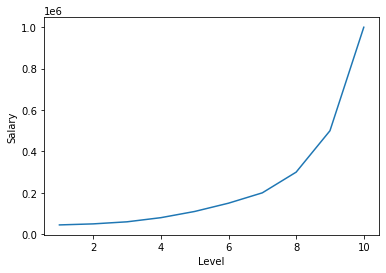

In [54]:
sb.lineplot(datav['Level'],datav['Salary'])

In [55]:
datav['Position']=le.fit_transform(datav['Position'])

In [56]:
datav.head()

,Position,Level,Salary
0,0,1,45000
1,4,2,50000
2,8,3,60000
3,5,4,80000
4,3,5,110000


C:\Users\sreev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Position', ylabel='Salary'>

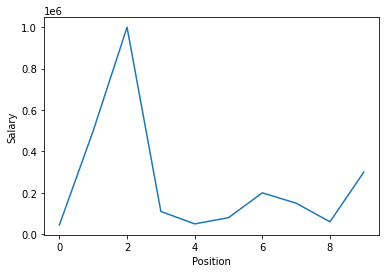

In [57]:
sb.lineplot(datav['Position'],datav['Salary'])

In [58]:
datav.drop(columns=["Level"],inplace=True)

In [59]:
datav.head()

,Position,Salary
0,0,45000
1,4,50000
2,8,60000
3,5,80000
4,3,110000


In [65]:
x=datav.iloc[:,1:2].values
y=datav.iloc[:,:2].values
y

array([[      0,   45000],
       [      4,   50000],
       [      8,   60000],
       [      5,   80000],
       [      3,  110000],
       [      7,  150000],
       [      6,  200000],
       [      9,  300000],
       [      1,  500000],
       [      2, 1000000]], dtype=int64)

In [ ]:
x=datav["Salary"]
y=datav["Position"]

# CONVERT NORMAL FEATURES INTO POLYNOMIAL FEATURES

In [ ]:
#IMPORTING functions which will convert normal features to polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

In [ ]:
x_poly = PolynomialFeatures(degree=3)

In [ ]:
x=pd.DataFrame(x,columns=["Position"])

In [ ]:
x.shape

In [ ]:
x_values=x_poly.fit_transform(x)